In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.rc('font', family='Malgun Gothic')

In [4]:
cctv_seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='cp949')
cctv_seoul

,구분,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655
5,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219
6,중랑구,"3,737",346,21.0,253.0,72,132,155,153,174,1049,934,448
7,성북구,"4,602",81,78.0,170.0,229,322,594,890,867,714,253,404
8,강북구,"3,090",8,0.0,22.0,61,124,251,29,391,1078,656,470
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593


In [5]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655


In [15]:
population_seoul = pd.read_excel('Population_in_Seoul.xls',
                                 header=2, usecols='B, D, G, J, N')
population_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [7]:
population_seoul.rename(columns={population_seoul.columns[0]:'구별',
                                 population_seoul.columns[1]:'인구수',
                                 population_seoul.columns[2]:'한국인',
                                 population_seoul.columns[3]:'외국인',
                                 population_seoul.columns[4]:'고령자'}, inplace=True)
population_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
cctv_seoul.sort_values(by='소계').head()

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593
19,동작구,"2,306",41,24.0,25.0,503,128,253,271,300,322,419,20
17,금천구,"2,411",0,0.0,174.0,80,361,133,196,539,367,513,48
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403


In [9]:
cctv_seoul.isnull().sum()

구별          0
소계          0
2012년 이전    0
2012년       1
2013년       1
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

In [10]:
cctv_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
22,강남구,"6,871",69,67.0,66.0,580,830,1293,988,745,791,926,516
20,관악구,"5,149",440,84.0,431.0,439,609,622,688,674,595,331,236
16,구로구,"4,608",852,216.0,349.0,187,268,326,540,488,434,415,533
7,성북구,"4,602",81,78.0,170.0,229,322,594,890,867,714,253,404
11,은평구,"4,131",14,3.0,44.0,332,329,555,403,635,1057,288,471


In [11]:
cctv_seoul['최근증가율'] = (cctv_seoul['2019년'] +cctv_seoul['2020년'] + cctv_seoul['2021년']) / cctv_seoul['2018년'] * 100

In [12]:
cctv_seoul

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0,245.882353
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403,238.082902
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228,921.600000
3,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283,300.000000
4,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655,331.612903
5,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219,328.358209
6,중랑구,"3,737",346,21.0,253.0,72,132,155,153,174,1049,934,448,1397.126437
7,성북구,"4,602",81,78.0,170.0,229,322,594,890,867,714,253,404,158.131488
8,강북구,"3,090",8,0.0,22.0,61,124,251,29,391,1078,656,470,563.682864
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593,444.594595


In [80]:
population_seoul.drop([0], axis=0, inplace=True)

In [81]:
population_seoul.drop([26], axis=0, inplace=True)


In [82]:
population_seoul['외국인비율'] = population_seoul['외국인'] / population_seoul['인구수'] * 100
population_seoul['고령자비율'] = population_seoul['고령자'] / population_seoul['인구수'] * 100
population_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [83]:
population_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [84]:
population_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [85]:
merged_df = pd.merge(cctv_seoul, population_seoul, on='구별')
merged_df.head()

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0,245.882353,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228,921.600000,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
2,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283,300.000000,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
3,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655,331.612903,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
4,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219,328.358209,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [88]:
for y in range(2012, 2022):
    merged_df = merged_df.drop(f'{y}년', axis=1)

In [90]:
# del merged_df['2012년 이전']
# del merged_df['2012년']
# del merged_df['2013년']
# del merged_df['2014년']
# del merged_df['2015년']
# del merged_df['2016년']
# del merged_df['2017년']
# del merged_df['2018년']
# del merged_df['2019년']
# del merged_df['2020년']
# del merged_df['2021년']

In [91]:
merged_df.head()

,구별,소계,2012년 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,"1,715",815,245.882353,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,용산구,"2,611",34,921.600000,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
2,성동구,"3,829",163,300.000000,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
3,광진구,"3,211",35,331.612903,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
4,동대문구,"2,628",4,328.358209,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [92]:
merged_df.set_index('구별', inplace=True)

In [93]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   소계        24 non-null     object 
 1   2012년 이전  24 non-null     int64  
 2   최근증가율     24 non-null     float64
 3   인구수       24 non-null     float64
 4   한국인       24 non-null     float64
 5   외국인       24 non-null     float64
 6   고령자       24 non-null     float64
 7   외국인비율     24 non-null     float64
 8   고령자비율     24 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.9+ KB


In [94]:
merged_df['소계'] = merged_df['소계'].str.replace(',','').astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   소계        24 non-null     int32  
 1   2012년 이전  24 non-null     int64  
 2   최근증가율     24 non-null     float64
 3   인구수       24 non-null     float64
 4   한국인       24 non-null     float64
 5   외국인       24 non-null     float64
 6   고령자       24 non-null     float64
 7   외국인비율     24 non-null     float64
 8   고령자비율     24 non-null     float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 1.8+ KB


In [95]:
merged_df

,소계,2012년 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
종로구,1715,815,245.882353,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
용산구,2611,34,921.600000,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,3829,163,300.000000,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,3211,35,331.612903,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
동대문구,2628,4,328.358209,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
중랑구,3737,346,1397.126437,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
성북구,4602,81,158.131488,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
강북구,3090,8,563.682864,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
도봉구,1930,128,444.594595,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


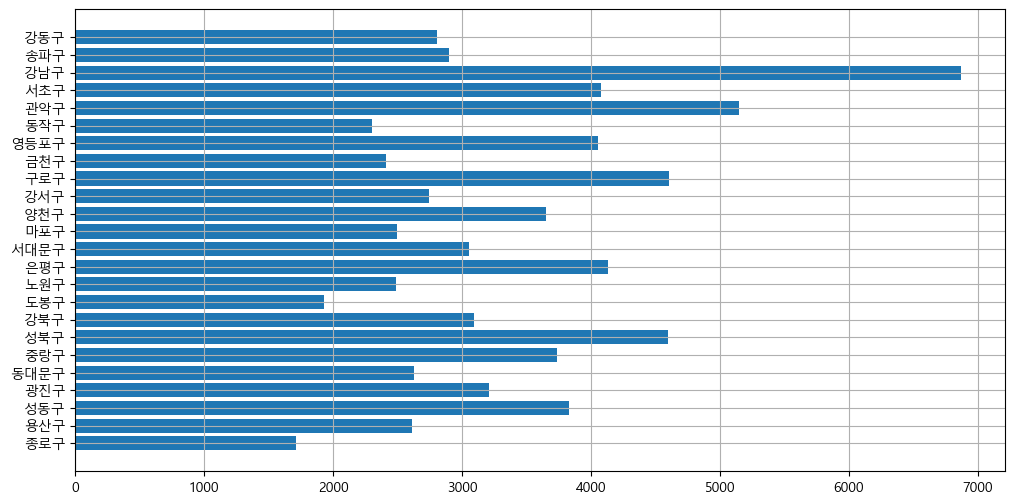

In [99]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.barh(merged_df.index, merged_df['소계'])
plt.grid()
plt.show()